In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

Recap: we did some curve fitting. Get some data, visualize it and estimate a good fit function visually. Then write the function template, and use __curve_fit__ to estimate the parameters of the function.

In [2]:
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [3]:
x = np.linspace(0, 10, 100) 
y = func(x, 1, 5, 2)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

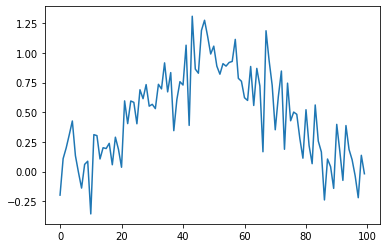

In [4]:
plt.plot(yn)

In [5]:
# Executing curve_fit on noisy data 
popt, pcov = curve_fit(func, x, yn)

In [6]:
print(popt)

[ 0.9655449   5.01014967 -2.02652913]


### Solutions to Functions ###

In [7]:
line = lambda x: x + 3

In [8]:
type(line)

function

In [9]:
solution = fsolve(line, 0) 
print(solution)

[-3.]


In [10]:
# Defining function to simplify intersection solution 
def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)

In [11]:
# Defining functions that will intersect
funky = lambda x : np.cos(x / 5) * np.sin(x / 2) 
line = lambda x : 0.01 * x - 0.5

In [12]:
x = np.linspace(0,100,100)

In [13]:
# to see the plot of this function, we generate some y values
y1 = [funky(x) for x in x]

In [14]:
y2 = [line(x) for x in x]

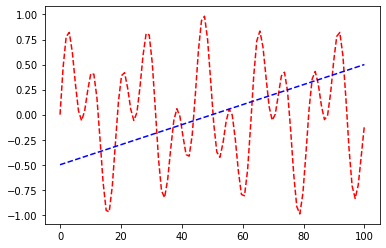

In [15]:
plt.plot(x, y1, 'r--', x, y2, 'b--')
plt.show()

In [25]:
# Defining range and getting solutions on intersection points
x = np.linspace(0,45,10000)
result = findIntersection(funky, line, [10, 20, 30, 35, 40, 45])

In [26]:
# Printing out results for x and y 
print(result, line(result))

[18.11366126 18.11366126 31.78330864 37.07999919 39.84837786 43.8258775 ] [-0.31886339 -0.31886339 -0.18216691 -0.12920001 -0.10151622 -0.06174123]


### Interpolation ###

Assume a functional form (model) and predict values based on a sample dataset. There is univariate and multivariate interpolation.

In [27]:
from scipy.interpolate import interp1d

In [28]:
# Setting up fake data
x = np.linspace(0, 10 * np.pi, 20) 
y = np.cos(x)

In [29]:
len(y)

20

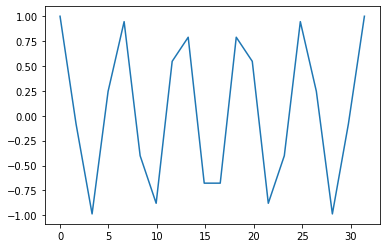

In [30]:
plt.plot(x, y)

In [31]:
# Interpolating data
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')

In [32]:
type(fl)

scipy.interpolate.interpolate.interp1d

In [33]:
print("{}, {}".format(x.min(), x.max()))

0.0, 31.41592653589793


In [34]:
# x.min and x.max are used to make sure we do not 
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint) 
yintq = fq(xint)

In [35]:
len(yintl)

1000

The interpolation API approximates the value of an unknown function by using the provided functional form (linear, quadratic). Note that our earlier graph was rugged because we only had 20 values. Now use the interpolation function to plot 1000 values, giving us much smoother curves.

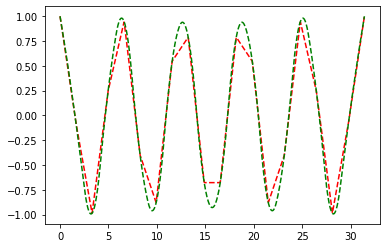

In [36]:
plt.plot(xint, yintl, 'r--', xint, yintq, 'g--')
plt.show()

In [37]:
from scipy.interpolate import UnivariateSpline

In [38]:
# Setting up fake data with artificial noise
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10

In [39]:
len(y)

30

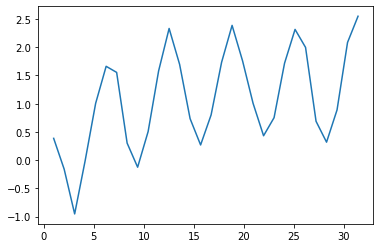

In [40]:
plt.plot(x, y)

In [41]:
# Interpolating the data
f = UnivariateSpline(x, y, s=1)

In [42]:
# x.min and x.max are used to make sure we do not 
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)

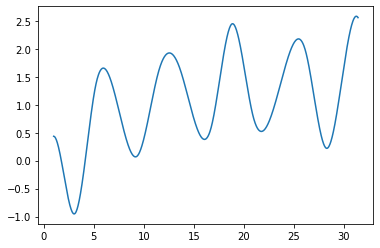

In [43]:
plt.plot(xint, yint)

In [44]:
# let's change the smoothing factor
f2 = UnivariateSpline(x, y, s=0)

In [45]:
yint2 = f2(xint)

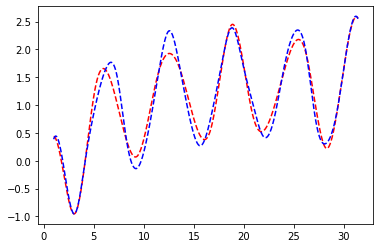

In [46]:
plt.plot(xint, yint, 'r--', xint, yint2, 'b--')
plt.show()

### Statistics ###

In [47]:
# Constructing a random array with 1000 elements 
x = np.random.randn(1000)

In [48]:
# Calculating several of the built-in methods # that numpy.array has
mean = x.mean()
std = x.std()
var = x.var()

In [49]:
print("mean={:.2f} std={:.2f} var={:.2f}".format(mean, std, var))

mean=-0.07 std=0.99 var=0.98


PDFs, CDFs and RVs

In [50]:
from scipy.stats import norm

In [51]:
# Set up the sample range 
x = np.linspace(-5,5,1000)

In [52]:
# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation. 
dist = norm(loc=0, scale=1)

In [53]:
# Retrieving norm's PDF and CDF 
pdf = dist.pdf(x)
cdf = dist.cdf(x)

In [54]:
type(pdf)

numpy.ndarray

In [55]:
# Here we draw out 500 random values from the norm. 
sample = dist.rvs(500)

In [56]:
sample[:10]

array([ 0.28613746,  0.0961262 , -1.84868977,  1.08031816,  0.2942911 ,
        0.49244559,  0.4138952 , -0.44087477, -1.46477454,  0.51797877])

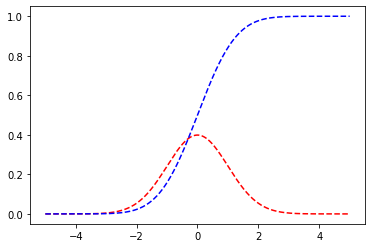

In [57]:
plt.plot(x, pdf, 'r--', x, cdf, 'b--')
plt.show()

In [58]:
from scipy.stats import geom

$$PMF = (1 − p)^{(k−1)} p$$

In [59]:
# Here set up the parameters for the geometric distribution. 
p = 0.5
dist = geom(p)

In [60]:
# Set up the sample range. 
x = np.linspace(0, 5, 1000)

In [61]:
# Retrieving geom's PMF and CDF 
pmf = dist.pmf(x)
cdf = dist.cdf(x)

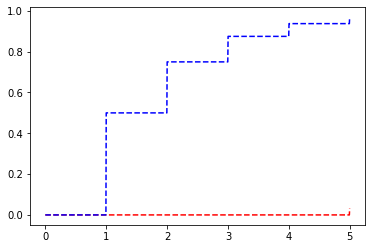

In [62]:
plt.plot(x, pmf, 'r--', x, cdf, 'b--')
plt.show()

In [63]:
from scipy.stats import poisson

$$ f(k) = e^{(-\mu)} \frac{\mu^k}{k!} $$

In [64]:
mu = 0.6
dist = poisson(mu)

In [65]:
# Set up the sample range. 
x = np.linspace(0, 5, 1000)

In [66]:
# Retrieving geom's PMF and CDF 
pmf = dist.pmf(x)
cdf = dist.cdf(x)

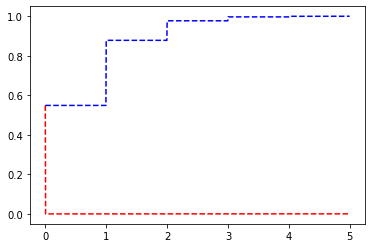

In [67]:
plt.plot(x, pmf, 'r--', x, cdf, 'b--')
plt.show()

In [68]:
print("{:f}".format(np.e**-0.6))

0.548812


Next week we will start with __Machine Learning__!!!